<a href="https://colab.research.google.com/github/26sneharoy/UST_dataScience/blob/main/UST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1 **- Import the required libraries,here we are importing 
pandas as used since we have to take the csv file and use it for coding that is for analysing the data,
matplotlib

In [206]:
import pandas as pd

**STEP 2**- analysing the data

In [207]:
data = pd.read_csv("/content/US_births_1994-2003_CDC_NCHS.csv")

**STEP 3**-checking the data

In [251]:
data


,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
3647,2003,12,27,6,8646
3648,2003,12,28,7,7645
3649,2003,12,29,1,12823
3650,2003,12,30,2,14438


**STEP 4**-Here we are with the preprocessing step. For that we are importing standardscalar inorder to standarise the range of inputdataset

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [210]:
scaler.fit(data.drop('year',axis=1))
scaled_features = scaler.transform(data.drop('year',axis=1))

**STEP 5**-Since we are using knn as it is a supervised learning algorithm we need to train the code. Inorder to train we spliting the data and training 

In [252]:
from sklearn.model_selection import train_test_split

In [212]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,data['year'],
                                                    test_size=0.30)

 **STEP **6- Here we are importing the kneighborsclassifier for the classification of the data

In [213]:
from sklearn.neighbors import KNeighborsClassifier

**STEP 7**-Here we are assigning the number of neighbors to be 3 

In [229]:
knn = KNeighborsClassifier(n_neighbors=3)

In [230]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**STEP 8**-In this we are predicting the values using the x_test

In [231]:
pred = knn.predict(x_test)
pred

array([1997, 1999, 1995, ..., 1998, 1996, 1994])

**STEP 9**-Importing the libraries to produce the confusion matrix, accuracy score and the classification report

In [232]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

 **STEP 10**-Classification report produces a report which shows the precisions  using the tested value and the predicted value

In [241]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        1994       0.00      0.00      0.00       105
        1995       0.00      0.00      0.00       106
        1996       0.02      0.02      0.02       109
        1997       0.00      0.00      0.00       118
        1998       0.01      0.01      0.01       100
        1999       0.00      0.00      0.00       117
        2000       0.00      0.00      0.00       109
        2001       0.01      0.01      0.01       111
        2002       0.00      0.00      0.00       112
        2003       0.01      0.01      0.01       109

    accuracy                           0.00      1096
   macro avg       0.01      0.00      0.00      1096
weighted avg       0.00      0.00      0.00      1096



**STEP 11-**The confusion matrix shows the performance of the classification in the matrix format

In [242]:
print(confusion_matrix(y_test,pred))

[[ 0 35  2  0  3 36 27  2  0  0]
 [41  0 17  2  0  2 29 12  3  0]
 [ 1 18  2 47  9  0  1 11 17  3]
 [ 3  3 35  0 48  2  0  1 10 16]
 [ 9  1  5 36  1 39  0  0  2  7]
 [38  4  0  7 52  0 11  0  1  4]
 [14 30  1  2  1 10  0 43  6  2]
 [ 2 18  7  2  0  1 31  1 42  7]
 [ 0  1 22 13  4  1  5 32  0 34]
 [ 1  0  5 17  9  6  3 17 50  1]]


**STEP 12**-Accuracey score depicts the accuracy in the prediction of the classification

In [243]:
print(accuracy_score(pred,y_test))

0.004562043795620438


**STEP 13**-Importing numpy since we are going to work with arrays for finding the error rate.

In [235]:
import numpy as np

**STEP 14**-Here we are finding the error rate difference between the actual and predicted

In [236]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

**STEP 15**-Here we are importing the matplotlib as this library helps to visualisation of data.

In [237]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

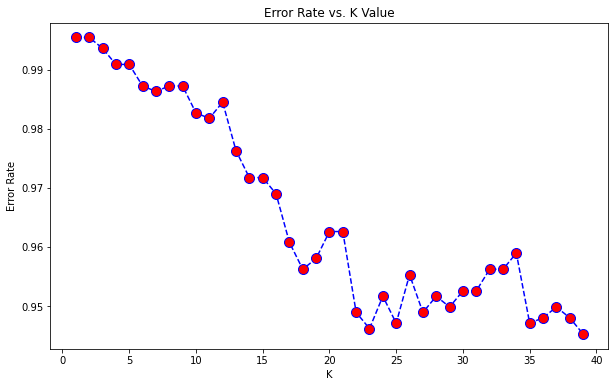

In [238]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**STEP 16**-we are trying the same with the number of neighbors 1

In [249]:
knn1 = KNeighborsClassifier(n_neighbors=1)

knn1.fit(x_train,y_train)
pred1 = knn1.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred1))

WITH K=1


[[ 0 35  2  0  3 36 27  2  0  0]
 [41  0 17  2  0  2 29 12  3  0]
 [ 1 18  2 47  9  0  1 11 17  3]
 [ 3  3 35  0 48  2  0  1 10 16]
 [ 9  1  5 36  1 39  0  0  2  7]
 [38  4  0  7 52  0 11  0  1  4]
 [14 30  1  2  1 10  0 43  6  2]
 [ 2 18  7  2  0  1 31  1 42  7]
 [ 0  1 22 13  4  1  5 32  0 34]
 [ 1  0  5 17  9  6  3 17 50  1]]


In [247]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

        1994       0.00      0.00      0.00       105
        1995       0.00      0.00      0.00       106
        1996       0.02      0.02      0.02       109
        1997       0.00      0.00      0.00       118
        1998       0.01      0.01      0.01       100
        1999       0.00      0.00      0.00       117
        2000       0.00      0.00      0.00       109
        2001       0.01      0.01      0.01       111
        2002       0.00      0.00      0.00       112
        2003       0.01      0.01      0.01       109

    accuracy                           0.00      1096
   macro avg       0.01      0.00      0.00      1096
weighted avg       0.00      0.00      0.00      1096



In [248]:
print(accuracy_score(pred1,y_test))

0.004562043795620438
